In [99]:
import torch
import os


class Para:
    feature_column_start_name = 'ep_ratio_ttm' # 'VOL5'
    feature_column_end_name = 'BR' # 'AROON_DOWN'

    feature_num = 16 # 8

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    data_path = 'data/sk_space_1d_rate_20d_up_test'
    model_path = 'models/model_sk_c2_s0.1_b16_lr0.001_d0.5_e100_up.pth'

    classification_n = 2

    month_num = len(os.listdir(data_path))

para = Para()
print(para.month_num)

1


In [100]:
import numpy as np
import torch
from my_utils.model_class import MLP
import pandas as pd

def insert_predict(df: pd.DataFrame, model_path, out_nums: int, column_name: str) -> pd.DataFrame:

    # 加载模型
    model = MLP(in_nums=para.feature_num, out_nums=out_nums, drop_p=0.5)
    model.load_state_dict(torch.load(model_path, map_location=para.device))
    model = model.to(para.device)

    # 运算
    model.eval()
    predict_tensor = model(torch.Tensor(df.loc[:, para.feature_column_start_name: para.feature_column_end_name].values).to(device=para.device))

    # 插入 predict_tensor 列
    df.insert(loc=0, column='predict_tensor_'+column_name, value=np.nan)
    # 插入 predict_return_bin 列
    df.insert(loc=0, column='predict_return_bin_'+column_name, value=np.nan)

    df['predict_tensor'+'_'+column_name] = predict_tensor.to(device='cpu').detach().numpy().tolist()
    df['predict_return_bin'+'_'+column_name] = predict_tensor.to(device='cpu').detach().numpy().argmax(1)

    return df

In [101]:
df = pd.DataFrame()

for i_csv in range(para.month_num):
    df = pd.read_csv(para.data_path +'/' + str(i_csv) + '.csv', index_col='order_book_id')

df

,board_type,sector_code,month,date,yield_rate,ep_ratio_ttm,pb_ratio_ttm,sp_ratio_ttm,MACD_DIFF,MACD_DEA,...,RSI10,SY,BIAS20,VOL30,VOL60,VOL120,VOLT20,VOLT60,AR,BR
order_book_id,,,,,,,,,,,,,,,,,,,,,
600376.XSHG,MainBoard,RealEstate,0,2020-03-02,-0.558663,1.523242,1.004711,0.107141,-1.204288,-1.502120,...,-0.107422,0.172696,0.546632,0.589315,0.638739,0.936430,-0.215725,1.480014,1.343977,-1.176594
600376.XSHG,MainBoard,RealEstate,1,2020-03-03,-0.695916,1.530943,0.983002,0.128073,-1.071644,-1.423122,...,0.089826,-0.541907,0.416932,0.659391,0.683553,0.994460,-0.423857,1.523664,1.299882,-1.105863
600376.XSHG,MainBoard,RealEstate,2,2020-03-04,-1.524868,1.218614,1.916463,-0.720924,-0.619682,-1.265359,...,0.999582,-0.541907,2.071347,0.874184,0.821786,1.063159,-0.150182,1.523800,2.040535,-0.684230
600376.XSHG,MainBoard,RealEstate,3,2020-03-05,-1.475452,1.198173,1.981588,-0.776489,-0.231679,-1.057967,...,0.968211,0.172696,2.049945,0.990048,0.851856,1.042950,0.103611,1.522463,2.268369,-0.652622
600376.XSHG,MainBoard,RealEstate,4,2020-03-06,-1.173273,1.352026,1.504004,-0.358273,-0.091325,-0.862687,...,0.563541,0.172696,1.030087,1.066617,0.881003,1.047535,0.074880,1.535388,2.142563,-0.769494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600376.XSHG,MainBoard,RealEstate,238,2021-02-23,0.564579,-0.724052,-1.594744,1.313814,-0.246237,-0.515702,...,1.173320,0.172696,0.422542,-1.114454,-1.704314,-2.343498,-0.390394,-0.545100,-0.118088,0.307926
600376.XSHG,MainBoard,RealEstate,239,2021-02-24,0.563805,-0.729507,-1.572760,1.286198,-0.148388,-0.440814,...,1.518009,0.172696,0.528737,-1.098202,-1.688686,-2.357692,-0.549520,-0.607336,0.000036,0.258890
600376.XSHG,MainBoard,RealEstate,240,2021-02-25,0.283123,-0.803915,-1.264981,0.909469,0.041777,-0.341116,...,1.852478,0.172696,1.259085,-0.928154,-1.577982,-2.258667,-0.582637,-0.683071,0.456888,0.802950


In [102]:
import torchmetrics
import time
import matplotlib.pyplot as plt
import torch.nn.functional as F

precision = torchmetrics.Precision(average='none', num_classes=para.classification_n)
accuracy = torchmetrics.Accuracy()

# 插入预测数据
df = insert_predict(df=df, model_path=para.model_path, out_nums=para.classification_n, column_name='2c')

# 综合多个预测数据
df.insert(loc=0, column='predict_return_bin', value=np.nan)
df.loc[df['predict_return_bin_2c'].isin([0,]), 'predict_return_bin'] = 0
df['predict_return_bin'].replace(to_replace=np.nan, value=1, inplace=True)
df['predict_return_bin'] = df['predict_return_bin'].astype('int64')

df.insert(loc=0, column='probability', value=np.nan)
for stock_id in range(len(df.index)):
    df.iloc[stock_id, 0] = F.softmax(torch.tensor(df.iloc[stock_id, df.columns.get_loc('predict_tensor_2c')]), dim=0).numpy()[0]

# 插入实际 return_bin 列
df.insert(loc=0, column='return_bin', value=np.nan)
df.loc[df['yield_rate'] > 0.0, 'return_bin'] = 0
df['return_bin'].replace(to_replace=np.nan, value=1, inplace=True)
df['return_bin'] = df['return_bin'].astype('int64')

# 计算精确率
df = df.sort_values(by='probability', ascending=False)

pred = torch.tensor(df['predict_return_bin']).type(torch.LongTensor)
target = torch.tensor(df['return_bin']).type(torch.LongTensor)

print(pred)
print(target)

print(precision(preds=pred, target=target))
print(accuracy(preds=pred, target=target))

print(df.loc[df['yield_rate']>0.0, 'predict_return_bin'].value_counts())
print(df['return_bin'].value_counts())

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
tensor([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1

In [103]:
from rqdatac import get_price
import rqdatac

rqdatac.init()
hs300_df = get_price(order_book_ids='000300.XSHG', start_date='2022-01-01', end_date='2022-03-22', fields='close')

c:\users\millet\miniconda3\envs\torch1.8-gpu\lib\site-packages\rqdatac\client.py:197: UserWarning: rqdatac is already inited. Settings will be changed.
  warnings.warn("rqdatac is already inited. Settings will be changed.", stacklevel=0)


<AxesSubplot:xlabel='date'>

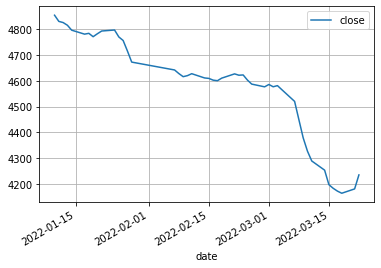

In [104]:
hs300 = hs300_df.reset_index(level='order_book_id').drop(labels='order_book_id', axis=1)
hs300.rolling(5).mean().plot(grid=True)

## 测试模型预测

In [105]:
import torch
from my_utils.model_class import MLP

model = MLP(in_nums=22, out_nums=2, drop_p=0.5)
model.load_state_dict(torch.load('models/model_c2_p[[0.0, 0.3], [0.7, 1.0]]_b32_lr0.001_d0.5_e500.pth', map_location=para.device))
model = model.to(para.device)

model.eval()
a = model(torch.Tensor([[0.5]*22]*4).to(device=para.device))
a

FileNotFoundError: [Errno 2] No such file or directory: 'models/model_c2_p[[0.0, 0.3], [0.7, 1.0]]_b32_lr0.001_d0.5_e500.pth'